<a href="https://colab.research.google.com/github/GertkingABP/MOIAD_LABS/blob/main/NN_UNPHIS_CTRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models

In [122]:
# Загрузка данных из CSV файлов
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")

In [123]:
# Разделение на признаки (X) и метки (y)
X_train = train_df.iloc[:, 1:].values / 255.0  # Нормализация значений пикселей до диапазона [0, 1]
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values / 255.0
y_test = test_df.iloc[:, 0].values

In [124]:
# Разделение на обучающий и проверочный наборы
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [125]:
# Изменение формы данных для подачи в нейронную сеть
X_train = X_train.reshape(-1, 28, 28, 1)
X_val = X_val.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

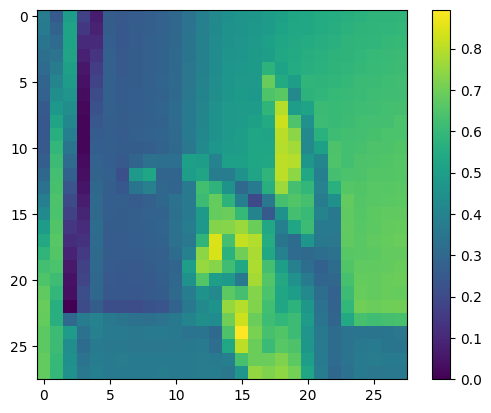

In [126]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)

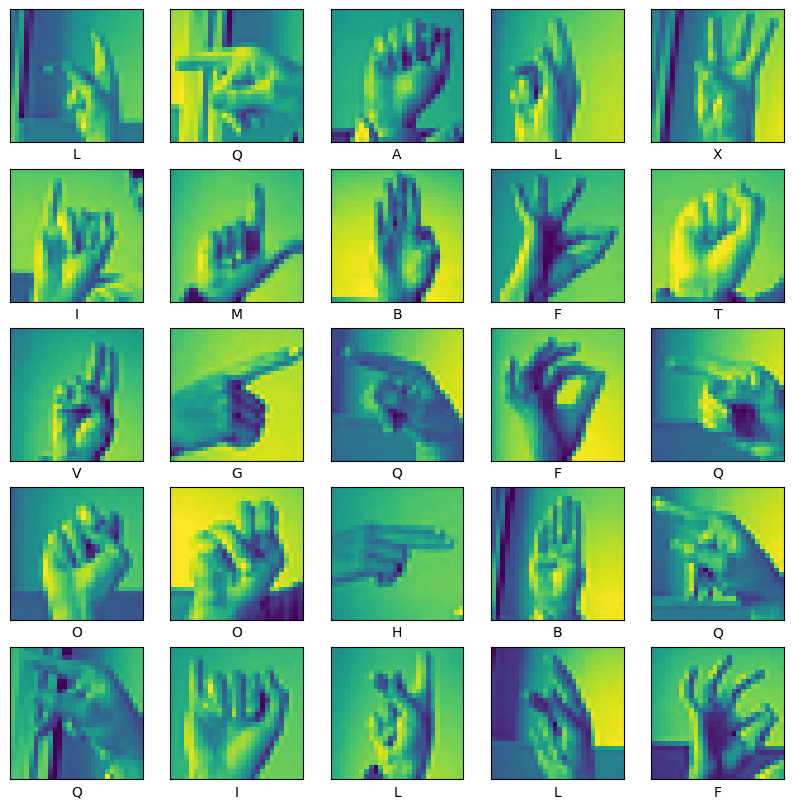

In [127]:
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']

plt.figure(figsize=(10, 10))

for i in range (25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
  plt.xlabel(class_names[y_train[i]])

In [130]:
# Создание модели нейронной сети
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(26, activation='softmax')
])

In [131]:
# Компиляция модели
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Оценка модели на тестовых данных
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

Epoch 1/10
687/687 [==============================] - 24s 32ms/step - loss: 1.4277 - accuracy: 0.5625 - val_loss: 0.3877 - val_accuracy: 0.8778
Epoch 2/10
687/687 [==============================] - 24s 35ms/step - loss: 0.1766 - accuracy: 0.9469 - val_loss: 0.0599 - val_accuracy: 0.9862
Epoch 3/10
687/687 [==============================] - 25s 36ms/step - loss: 0.0439 - accuracy: 0.9900 - val_loss: 0.0282 - val_accuracy: 0.9956
Epoch 4/10
687/687 [==============================] - 23s 34ms/step - loss: 0.0379 - accuracy: 0.9889 - val_loss: 0.0077 - val_accuracy: 0.9989
Epoch 5/10
687/687 [==============================] - 22s 32ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.0012 - val_accuracy: 1.0000
Epoch 6/10
687/687 [==============================] - 25s 37ms/step - loss: 0.0272 - accuracy: 0.9915 - val_loss: 0.0020 - val_accuracy: 0.9998
Epoch 7/10
687/687 [==============================] - 24s 36ms/step - loss: 9.5114e-04 - accuracy: 1.0000 - val_loss: 6.0969e-04 - val_a

In [132]:
# Предсказания

predictions = model.predict(X_test)

225/225 [==============================] - 2s 9ms/step


In [142]:
predictions[212]

array([8.11596976e-08, 6.22463948e-27, 7.05775528e-06, 1.05445440e-24,
       2.80916121e-16, 1.64519906e-12, 3.06816272e-14, 3.77104875e-10,
       8.09941740e-13, 1.78813405e-23, 2.17983469e-19, 5.46903780e-18,
       2.96453759e-08, 3.86212650e-06, 9.99988496e-01, 3.19827324e-11,
       1.66737473e-13, 1.47694715e-36, 4.49312040e-07, 5.04012810e-15,
       1.59297249e-32, 1.16466762e-29, 5.55710707e-35, 7.48648218e-16,
       1.26259897e-17, 1.43336231e-31], dtype=float32)

In [143]:
np.argmax(predictions[212])

14

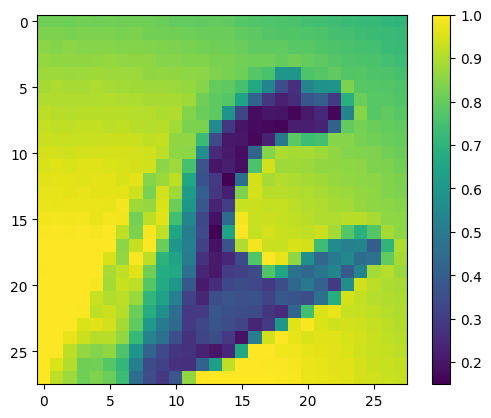

In [144]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_train[212])
plt.colorbar()
plt.grid(False)

In [137]:
# ДРУГАЯ АРХИТЕКТУРА НА ТОМ ЖЕ ДАТАСЕТЕ(2 ДАТАСЕТА, ОДИН - ОБУЧАЮЩИЕ ДАННЫЕ, ДРУГОЙ - ТЕСТОВЫЕ ДАННЫЕ)

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf

# Загрузка данных
train_df2 = pd.read_csv("sign_mnist_train.csv")
test_df2 = pd.read_csv("sign_mnist_test.csv")

# Разделение данных на признаки и метки
X_train2 = train_df2.drop(columns=['label']).values
y_train2 = train_df2['label'].values

X_test2 = test_df2.drop(columns=['label']).values
y_test2 = test_df2['label'].values

# Нормализация данных
X_train2 = X_train2 / 255.0
X_test2 = X_test2 / 255.0

# Преобразование меток в бинарный формат
label_binarizer = LabelBinarizer()
y_train2 = label_binarizer.fit_transform(y_train2)
y_test2 = label_binarizer.transform(y_test2)

# Создание модели
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(24, activation='softmax')
])

# Компиляция модели
model2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Обучение модели
model2.fit(X_train2, y_train2, epochs=10, batch_size=128, validation_data=(X_test2, y_test2))

# Оценка модели на тестовых данных
test_loss, test_accuracy = model2.evaluate(X_test2, y_test2)
print("Test Accuracy:", test_accuracy)

Epoch 1/10
215/215 [==============================] - 3s 13ms/step - loss: 2.2338 - accuracy: 0.3510 - val_loss: 1.7218 - val_accuracy: 0.4799
Epoch 2/10
215/215 [==============================] - 3s 13ms/step - loss: 1.3543 - accuracy: 0.5945 - val_loss: 1.3202 - val_accuracy: 0.6071
Epoch 3/10
215/215 [==============================] - 4s 18ms/step - loss: 1.0427 - accuracy: 0.6841 - val_loss: 1.1260 - val_accuracy: 0.6590
Epoch 4/10
215/215 [==============================] - 3s 12ms/step - loss: 0.8314 - accuracy: 0.7506 - val_loss: 1.0514 - val_accuracy: 0.6708
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.6824 - accuracy: 0.7987 - val_loss: 0.9394 - val_accuracy: 0.7011
Epoch 6/10
215/215 [==============================] - 3s 12ms/step - loss: 0.5715 - accuracy: 0.8348 - val_loss: 0.9315 - val_accuracy: 0.6956
Epoch 7/10
215/215 [==============================] - 3s 16ms/step - loss: 0.4834 - accuracy: 0.8573 - val_loss: 0.8695 - val_accuracy: 0.7018

In [138]:
# Предсказания 2 МОДЕЛИ

predictions2 = model2.predict(X_test2)

225/225 [==============================] - 1s 4ms/step


In [145]:
predictions2[212]

array([1.9602144e-02, 2.5796777e-07, 1.5062326e-02, 3.3385004e-09,
       2.7030474e-04, 5.2992469e-03, 1.7242127e-03, 1.8482099e-04,
       6.7489566e-03, 6.6533923e-10, 3.9428731e-08, 3.6345478e-05,
       4.4136221e-04, 8.1851614e-01, 1.4327807e-04, 2.5933431e-07,
       2.1064381e-12, 5.6745176e-04, 1.3116938e-01, 5.1674130e-11,
       7.4600720e-08, 2.3380065e-07, 2.3230191e-04, 8.7929504e-07],
      dtype=float32)

In [146]:
np.argmax(predictions2[212])

13

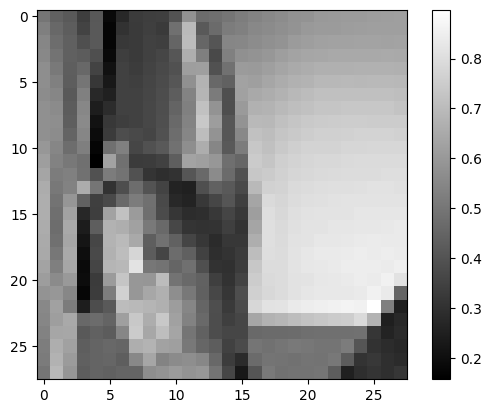

In [148]:
import matplotlib.pyplot as plt

# Преобразование одномерного массива в двумерный массив
image = X_train2[212].reshape(28, 28)

# Отображение изображения
plt.figure()
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [149]:
# СОХРАНЕНИЕ 2 РАЗНЫХ НЕЙРОННЫХ СЕТЕЙ
model.save("sign_language_model_V1.h5")
model2.save("sign_language_model_V2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
